In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split


In [2]:
# Load processed data
data = pd.read_csv("../data/processed/scaled_data.csv")

# Split the data into features and target
X = data.drop('Churn Label', axis=1)
y = data['Churn Label']

# Load the best model from grid search
best_model = joblib.load("models/best_churn_model.pkl")


In [3]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the union of X_train and X_test (for categorical columns)
for col in categorical_columns:
    if col in X_train.columns and col in X_test.columns:
        combined_data = pd.concat([X_train[col], X_test[col]], axis=0)  # Combine training and test data
        label_encoder.fit(combined_data.astype(str))  # Fit on the combined data
        
        # Apply the transformation to both X_train and X_test
        X_train[col] = label_encoder.transform(X_train[col].astype(str))
        X_test[col] = label_encoder.transform(X_test[col].astype(str))


In [19]:
# Ensure X_test has the same columns as X_train by aligning their columns
X_test = X_test.reindex(columns=X_train.columns)

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Now transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Ensure the model has been trained and that 'best_model' is your trained model.
# Predict the values using your model
y_pred = best_model.predict(X_test_scaled)


ValueError: X has 47 features, but RandomForestClassifier is expecting 48 features as input.

In [20]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


NameError: name 'y_pred' is not defined

In [21]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


C:\Users\vivek\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 47 features, but RandomForestClassifier is expecting 48 features as input.

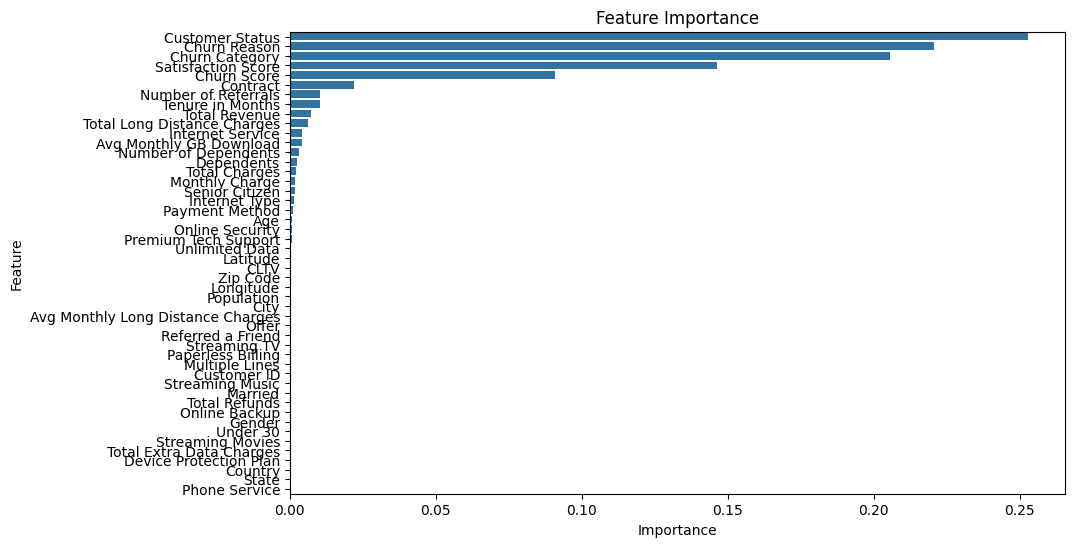

In [23]:
# Plot feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    features = X.columns
    
    # Create a DataFrame for plotting
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': feature_importances
    })
    
    # Sort the features by importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title("Feature Importance")
    plt.show()
else:
    print("Feature importance is not available for this model.")


In [24]:
# Save confusion matrix as an image
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("artifacts/confusion_matrix.png")

# Save ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.savefig("artifacts/roc_curve.png")

# Save the feature importance plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance")
plt.savefig("artifacts/feature_importance.png")


NameError: name 'cm' is not defined

<Figure size 600x600 with 0 Axes>

In [25]:
# Conclude the evaluation
print("Model evaluation complete. Review the following metrics for insights on performance.")
print(f"Best Model Parameters: {best_model.get_params()}")
print(f"ROC AUC Score: {roc_auc:.4f}")


Model evaluation complete. Review the following metrics for insights on performance.
Best Model Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


NameError: name 'roc_auc' is not defined